5727.197 seconds to transform 6920 examples
752.066 seconds to transform 872 examples
1515.792 seconds to transform 1821 examples
['A stirring, funny and finally transporting re-imagining of Beauty and the Beast and 1930s horror films', 'Apparently reassembled from the cutting-room floor of any given daytime soap.', "They presume their audience won't sit still for a sociology lesson, however entertainingly presented, so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes.", 'This is a visually stunning rumination on love, memory, history and the war between art and commerce.', "Jonathan Parker's Bartleby should have been the be-all-end-all of the modern-office anomie films.", 'Campanella gets the tone just right -- funny in the middle of sad in the middle of hopeful.', 'A fan film that for the uninitiated plays better on video with the sound turned down.', 'Béart and Berling are both superb, while Huppert ... is magnificen

[[  3.33636776e-02   4.19878885e-02  -3.95783223e-03 ...,   3.69493097e-01
    1.44297451e-01   2.27915589e-02]
 [  2.59505421e-01  -1.82411343e-01   1.74463242e-02 ...,   1.41895622e-01
    2.29973510e-01  -4.36259843e-02]
 [  1.41625136e-01  -5.50825149e-02  -1.64055899e-02 ...,   1.59394816e-01
    2.86475420e-01  -1.03958445e-02]
 ..., 
 [ -7.76377857e-01  -3.13089415e-02  -3.20691196e-03 ...,   5.38711138e-02
    3.54435623e-01   1.24164326e-02]
 [  2.61880159e-01  -1.02118708e-01  -3.53703387e-02 ...,   1.05537966e-01
    2.00563431e-01  -9.89550026e-05]
 [ -4.14879054e-01  -1.48530588e-01  -2.58404650e-02 ...,   4.04590219e-02
    2.27970436e-01  -5.24820052e-02]]
91.76 test accuracy
00.25 regularization coef
00145 features used


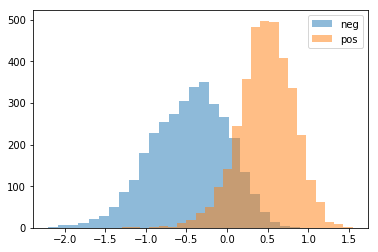

In [6]:
from encoder import Model
from matplotlib import pyplot as plt
from utils import sst_binary, train_with_reg_cv

model = Model()

#########################
## Loading data
## including 6920 sentences in training set
## 872 sentences in validation set
## 1821 sentences in test set
#########################
trX, vaX, teX, trY, vaY, teY = sst_binary()

##########################
## Representation the sentences with mLSTM
##########################
trXt = model.transform(trX)
vaXt = model.transform(vaX)
teXt = model.transform(teX)

print(trX)
print(trXt)

# classification results
full_rep_acc, c, nnotzero = train_with_reg_cv(trXt, trY, vaXt, vaY, teXt, teY)
print('%05.2f test accuracy'%full_rep_acc)
print('%05.2f regularization coef'%c)
print('%05d features used'%nnotzero)

# visualize sentiment unit, 2388th colomnof trXt
sentiment_unit = trXt[:, 2388]

plt.hist(sentiment_unit[trY==0], bins=25, alpha=0.5, label='neg')
plt.hist(sentiment_unit[trY==1], bins=25, alpha=0.5, label='pos')
plt.legend()
plt.show()

In [8]:
trXt.shape

(6920, 4096)

In [72]:
import pickle

pickle.dump(trXt, open('trXt.txt', 'wb'))
# pickle.dump(vaXt, open('vaXt.txt', 'wb'))
# pickle.dump(teXt, open('teXt.txt', 'wb'))

# 0.25 regularization coef

In [ ]:
trXt = pickle.load(open('trXt.txt', 'rb'))
vaXt = pickle.load(open('vaXt.txt', 'rb'))
teXt = pickle.load(open('teXt.txt', 'rb'))

## A simple test on sentiment unit

In [10]:
mytest = ["I’ll be in meetings after 6pm but I am still available at 5pm.",
          " So we can keep our phone touchpoint at 5pm in case you have questions for us or would like to discuss any issue.",
          " Let us know.",
          " Otherwise, let’s meet tomorrow morning as planned to review into more details your literature benchmark."]

model.transform(mytest)[:, 2388]

21.595 seconds to transform 4 examples


array([ 0.41472   ,  0.37732875,  0.2402226 , -0.00755513], dtype=float32)

## Test on tweets corpus

In [61]:
import numpy as np
import os
"""
Most standard models make use of a preprocessed/tokenized/lowercased version
of Stanford Sentiment Treebank. Our model extracts features from a version
of the dataset using the raw text instead which we've included in the data
folder.
"""

def read_tweets(path):
    labels = list([])
    data = list([])
    with open(path) as fp:
        for line in fp:
#             print(line)
            sentence = line.split()[2:]
            sentence = ' '.join(sentence)
            data.append(sentence)
            label =  line.split()[1]
            if label=='positive':
                labels.append(1)
            if label=='negative':
                labels.append(-1)
            if label=='neutral':
                labels.append(0)
    return data, np.array(labels)
            

data_dir = 'tweets_data/'
trX, trY = read_tweets(os.path.join(data_dir, 'twitter-2016train-A.txt'))
vaX, vaY = read_tweets(os.path.join(data_dir, 'twitter-2016dev-A.txt'))
teX, teY = read_tweets(os.path.join(data_dir, 'twitter-2016test-A.txt'))

print(len(trX),len(vaX),len(teX))

6000 1999 20632


5778.005 seconds to transform 6000 examples


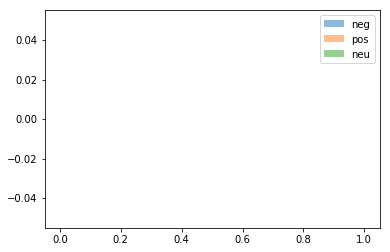

In [48]:
from encoder import Model
from matplotlib import pyplot as plt

model = Model()
##########################
## Representation the sentences with mLSTM
##########################
trXt = model.transform(trX)
# vaXt = model.transform(vaX)
# teXt = model.transform(teX)

# classification results
# full_rep_acc, c, nnotzero = train_with_reg_cv(trXt, trY, vaXt, vaY, teXt, teY)
# print('%05.2f test accuracy'%full_rep_acc)
# print('%05.2f regularization coef'%c)
# print('%05d features used'%nnotzero)


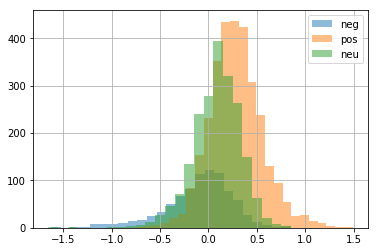

In [71]:
# visualize sentiment unit, 2388th colomnof trXt
sentiment_unit = trXt[:, 2388]

plt.hist(sentiment_unit[trY==-1], bins=25, alpha=0.5, label='neg')
plt.hist(sentiment_unit[trY==1], bins=25, alpha=0.5, label='pos')
plt.hist(sentiment_unit[trY==0], bins=25, alpha=0.5, label='neu')
plt.legend()
plt.grid()
plt.show()

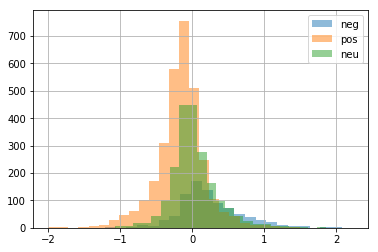

In [89]:
unit = np.argmax(abs(np.mean(trXt[trY==-1],0)-np.mean(trXt[trY==1],0)))

# visualize sentiment unit, 2449 colomnof trXt
sentiment_unit = trXt[:, unit]

plt.hist(sentiment_unit[trY==-1], bins=25, alpha=0.5, label='neg')
plt.hist(sentiment_unit[trY==1], bins=25, alpha=0.5, label='pos')
plt.hist(sentiment_unit[trY==0], bins=25, alpha=0.5, label='neu')
plt.legend()
plt.grid()
plt.show()

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=0.25, penalty='l1')
print(cross_val_score(logistic, trXt, trY, cv=4)) 
print(cross_val_score(logistic, trXt[trY!=0], trY[trY!=0], cv=4)) 

[ 0.60692871  0.61292472  0.58866667  0.64686248]
[ 0.83535354  0.85858586  0.8554095   0.87449393]
